## seaborn은 matplotlib을 더 사용하기 쉽게 해주는 라이브러리입니다.

* [pyplot 공식 도큐먼트 살펴보기](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
* [seaborn 공식 도큐먼트 살펴보기](https://seaborn.pydata.org/)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image

# seaborn
import seaborn as sns

In [0]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

## 0. 왜 Seaborn 인가요?

matplotlib으로 대부분의 시각화는 가능합니다. 하지만, 다음과 같은 이유로 `seaborn`을 많은 사람들이 선호합니다.

### 0-1. seaborn에서만 제공되는 통계 기반 plot

In [0]:
tips = sns.load_dataset("tips")

In [0]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title('violin plot')
plt.show()

In [0]:
sns.countplot(tips['day'])
plt.title('countplot')
plt.show()

In [0]:
sns.relplot(x='tip', y='total_bill', data=tips)
plt.title('relplot')
plt.show()

In [0]:
sns.lmplot(x='tip', y='total_bill', data=tips)
plt.title('relplot')
plt.show()

In [0]:
plt.title('heatmap')
sns.heatmap(tips.corr(), annot=True, linewidths=1)
plt.show()

### 0-2. 아름다운 스타일링

seaborn의 최대 장점 중 하나인, 아름다운 컬러팔레트입니다.

제가 최대 장점으로 꼽은 이유는, 

`matplotlib`의 기본 컬러 색상보다 `seaborn`은 스타일링에 크게 신경을 쓰지 않아도 **default 컬러가 예쁘게 조합**해 줍니다.

In [0]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

In [0]:
sns.barplot(x="day", y="total_bill", data=tips, palette='colorblind')
plt.show()

### 0-3. 컬러 팔레트

자세한 컬러팔레트는 **공식 도큐먼트**를 참고하세요

[Seaborn의 컬러팔레트](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)

In [0]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

In [0]:
sns.barplot(x="tip", y="total_bill", data=tips, palette='coolwarm')

In [0]:
sns.barplot(x="tip", y="total_bill", data=tips, palette='Reds')

### 0-4. pandas 데이터프레임과 높은 호환성

In [0]:
tips

In [0]:
sns.catplot(x="sex", y="total_bill",
#             hue="smoker", 
            data=tips, 
            kind="bar")
plt.show()

`hue` 옵션으로 bar를 구분

* xtick, ytick, xlabel, ylabel을 알아서 생성해 줍니다.
* legend 까지 자동으로 생성해 줍니다.
* 뿐만 아니라, 신뢰 구간도 알아서 계산하여 생성합니다.

In [0]:
sns.catplot(x="sex", y="total_bill",
            hue="smoker", 
            data=tips, 
            kind="bar")
plt.show()

`col`옵션 하나로 그래프 자체를 분할해 줍니다.

In [0]:
sns.catplot(x="sex", y="total_bill",
            hue="smoker", 
            col="time",
            data=tips, 
            kind="bar")
plt.show()

## 1. Scatterplot

0 ~ 1 사이의 임의의 랜덤한 값을 생성합니다. 

In [83]:
np.random.rand(50)

array([0.63447223, 0.89822009, 0.58590512, 0.79673755, 0.59906941,
       0.90001995, 0.84335635, 0.24665123, 0.90924374, 0.02174041,
       0.93473012, 0.34650004, 0.92587281, 0.79149996, 0.93525177,
       0.94171477, 0.71132886, 0.08700318, 0.72655786, 0.16176745,
       0.83288288, 0.57135352, 0.36693247, 0.54230867, 0.03914726,
       0.54892171, 0.28359662, 0.4059565 , 0.40629196, 0.26523543,
       0.34315454, 0.59993912, 0.3252899 , 0.05997539, 0.2898475 ,
       0.1167938 , 0.25892458, 0.11085802, 0.10001959, 0.50772803,
       0.85355032, 0.36397091, 0.35543444, 0.89762439, 0.12635301,
       0.69057418, 0.84546064, 0.86456152, 0.42043149, 0.15943462])

0 부터 50개의 값을 순차적으로 생성합니다.

In [84]:
np.arange(50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

### 1-1. x, y, colors, area 설정하기

* colors 는 임의 값을 color 값으로 변환합니다.
* area는 점의 넓이를 나타냅니다. 값이 커지면 당연히 넓이도 커집니다.

In [0]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

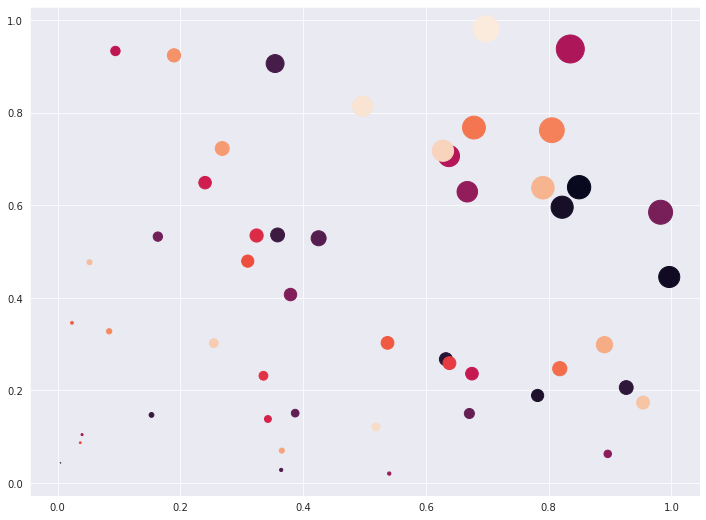

In [86]:
plt.scatter(x, y, s=area, c=colors)
plt.show()

* seaborn 에서는 `size`와 `sizes`를 동시에 지정해줍니다.
* `sizes` 옵션에서는 사이즈의 min, max를 명시해 줍니다.
* `hue`는 컬러 옵션입니다.
* `palette`를 통해 seaborn이 제공하는 아름다운 palette 를 이용하시면 됩니다.

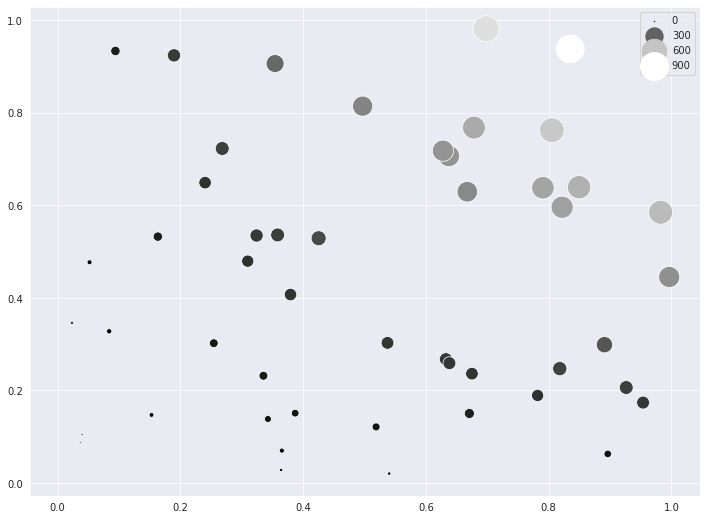

In [89]:
sns.scatterplot(x, y, size=area, sizes=(area.min(), area.max()), hue=area, palette='gist_gray')
plt.show()

### 1-2. cmap과 alpha

* cmap에 컬러를 지정하면, 컬러 값을 모두 같게 가져갈 수도 있습니다.
* alpha값은 투명도를 나타내며 0 ~ 1 사이의 값을 지정해 줄 수 있으며, 0에 가까울 수록 투명한 값을 가집니다.

In [90]:
np.random.rand(50)

array([0.36833227, 0.46049731, 0.95989357, 0.31390778, 0.71611415,
       0.88825085, 0.41214511, 0.2093466 , 0.9229964 , 0.57950208,
       0.08598049, 0.24012342, 0.56633009, 0.54486638, 0.5921945 ,
       0.65999367, 0.67313399, 0.65466821, 0.86117082, 0.37408885,
       0.07831586, 0.18135804, 0.60774899, 0.18807833, 0.4547361 ,
       0.88740627, 0.95235487, 0.51894174, 0.53728373, 0.67952143,
       0.99063183, 0.20246678, 0.31075634, 0.16861203, 0.83076744,
       0.82658692, 0.27170437, 0.17558444, 0.25393545, 0.320067  ,
       0.16056808, 0.28012221, 0.96754479, 0.97181751, 0.22240193,
       0.59664015, 0.51304849, 0.20256864, 0.3504086 , 0.03772233])

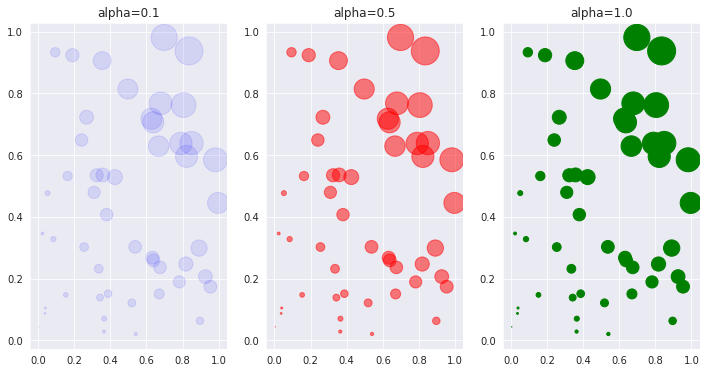

In [91]:
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(x, y, s=area, c='blue', alpha=0.1)
plt.title('alpha=0.1')
plt.subplot(132)
plt.title('alpha=0.5')
plt.scatter(x, y, s=area, c='red', alpha=0.5)
plt.subplot(133)
plt.title('alpha=1.0')
plt.scatter(x, y, s=area, c='green', alpha=1.0)

plt.show()

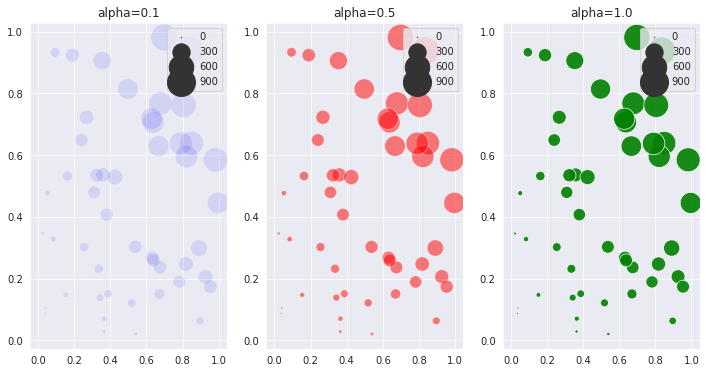

In [92]:
plt.figure(figsize=(12, 6))

plt.subplot(131)
sns.scatterplot(x, y, size=area, sizes=(area.min(), area.max()), color='blue', alpha=0.1)
plt.title('alpha=0.1')

plt.subplot(132)
plt.title('alpha=0.5')
sns.scatterplot(x, y, size=area, sizes=(area.min(), area.max()), color='red', alpha=0.5)

plt.subplot(133)
plt.title('alpha=1.0')
sns.scatterplot(x, y, size=area, sizes=(area.min(), area.max()), color='green', alpha=0.9)

plt.show()

## 2. Barplot, Barhplot

1개의 canvas 안에 다중 그래프 그리기

### 2-1. 기본 Barplot 그리기

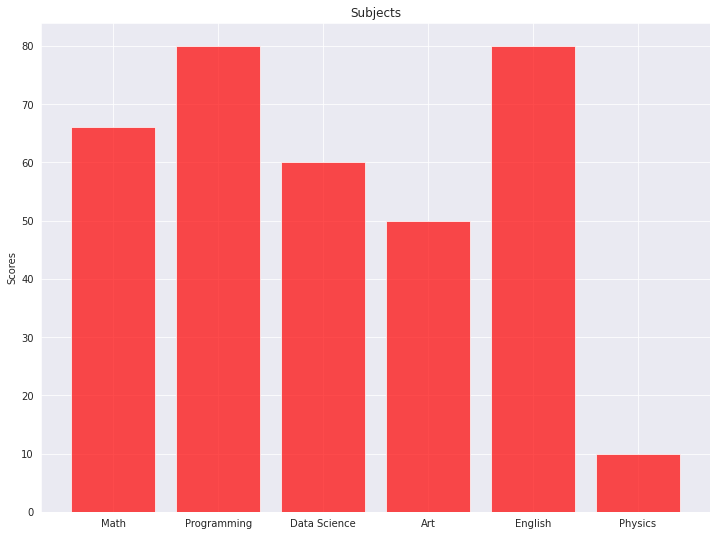

In [93]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.bar(x, y, align='center', alpha=0.7, color='red')

plt.xticks(x)
plt.ylabel('Scores')
plt.title('Subjects')

plt.show()

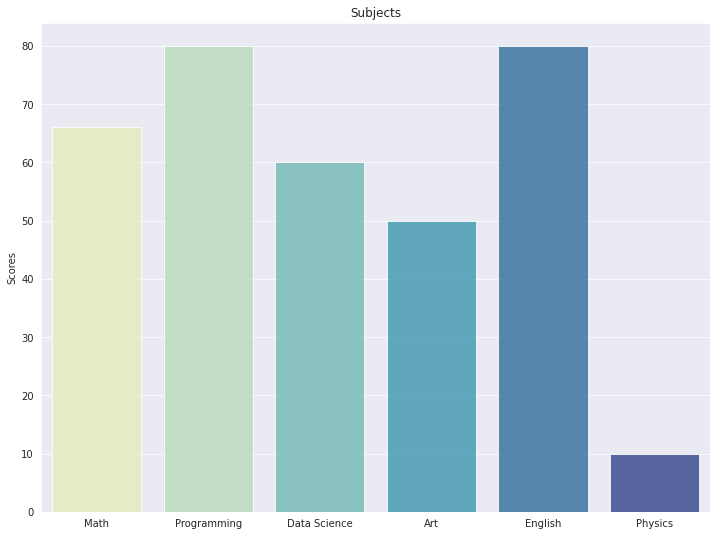

In [94]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

sns.barplot(x, y, alpha=0.8, palette='YlGnBu')

plt.ylabel('Scores')
plt.title('Subjects')
plt.show()

### 2-2. 기본 Barhplot 그리기

barh 함수에서는 **xticks로 설정**했던 부분을 **yticks로 변경**합니다.

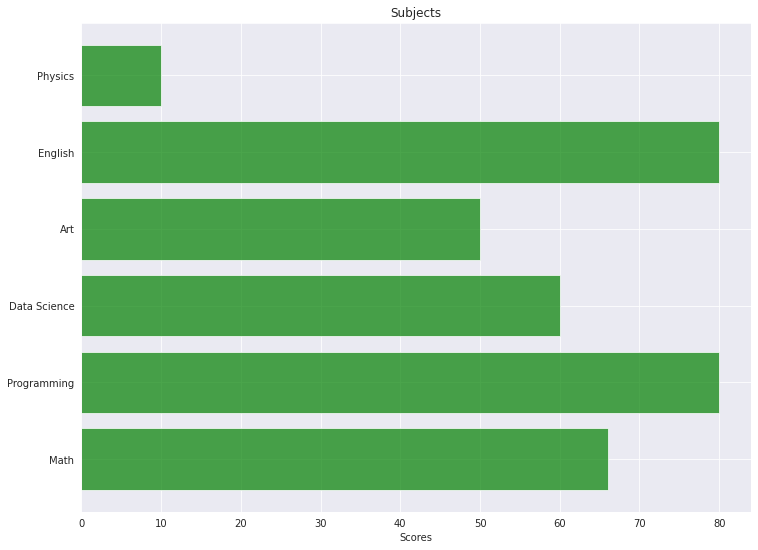

In [95]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.barh(x, y, align='center', alpha=0.7, color='green')
plt.yticks(x)
plt.xlabel('Scores')
plt.title('Subjects')

plt.show()

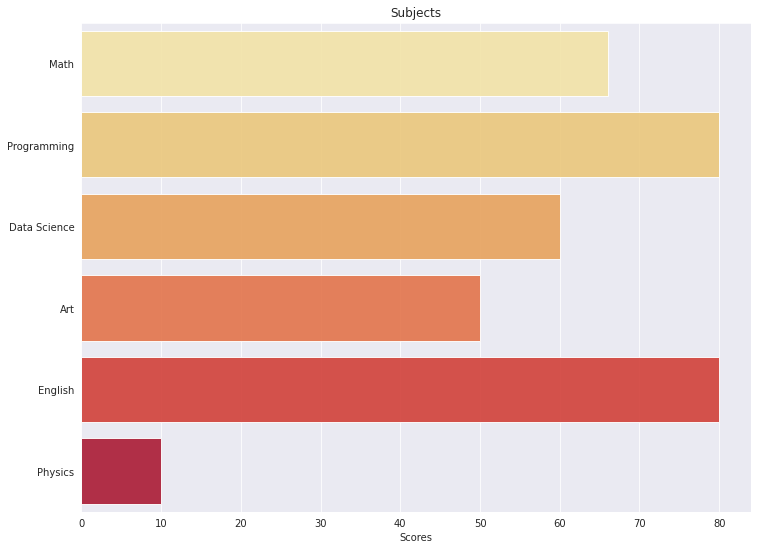

In [96]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

ax = sns.barplot(y, x, alpha=0.9, palette='YlOrRd')

plt.xlabel('Scores')
plt.title('Subjects')

plt.show()

### Batplot에서 비교 그래프 그리기

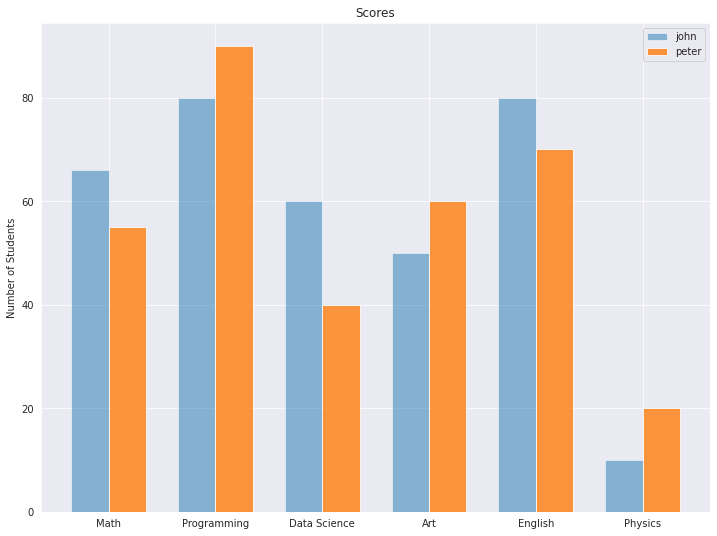

In [97]:
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label))
y_1 = [66, 80, 60, 50, 80, 10]
y_2 = [55, 90, 40, 60, 70, 20]

# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.bar(x - width/2, y_1, width, align='center', alpha=0.5)
axes.bar(x + width/2, y_2, width, align='center', alpha=0.8)

# xtick 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.ylabel('Number of Students')
plt.title('Scores')

plt.legend(['john', 'peter'])

plt.show()

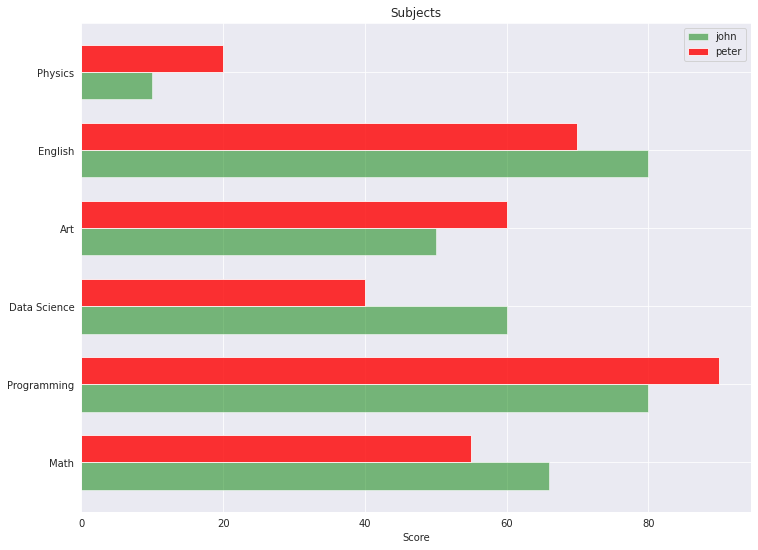

In [98]:
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label))
y_1 = [66, 80, 60, 50, 80, 10]
y_2 = [55, 90, 40, 60, 70, 20]

# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.barh(x - width/2, y_1, width, align='center', alpha=0.5, color='green')
axes.barh(x + width/2, y_2, width, align='center', alpha=0.8, color='red')

# xtick 설정
plt.yticks(x)
axes.set_yticklabels(x_label)
plt.xlabel('Score')
plt.title('Subjects')

plt.legend(['john', 'peter'])

plt.show()

Seaborn에서는 위의 `matplotlib`과 조금 다른 방식을 취합니다.

**실전 tip.**
* 그래프를 임의로 그려야 하는 경우 -> `matplotlib`
* DataFrame을 가지고 그리는 경우 -> `seaborn`

seaborn 에서는 `hue` 옵션으로 매우 쉽게 비교 **barplot**을 그릴 수 있습니다.

In [99]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


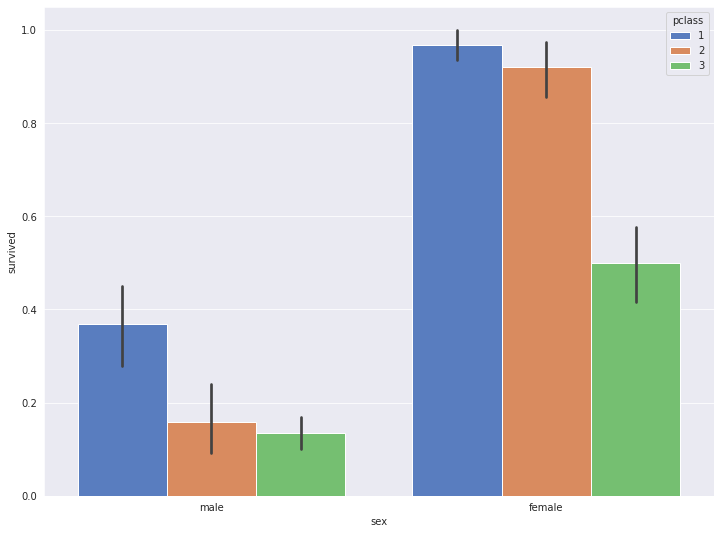

In [102]:
sns.barplot(x='sex', y='survived', hue='pclass', data=titanic, palette="muted")
plt.show()

## 3. Line Plot

### 3-1. 기본 lineplot 그리기

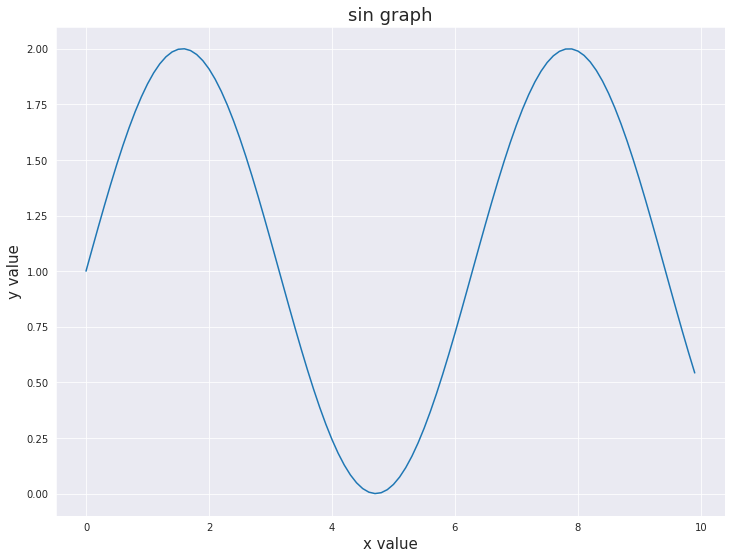

In [106]:
x = np.arange(0, 10, 0.1)
y = 1 + np.sin(x)

plt.plot(x, y)

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin graph', fontsize=18)

plt.show()

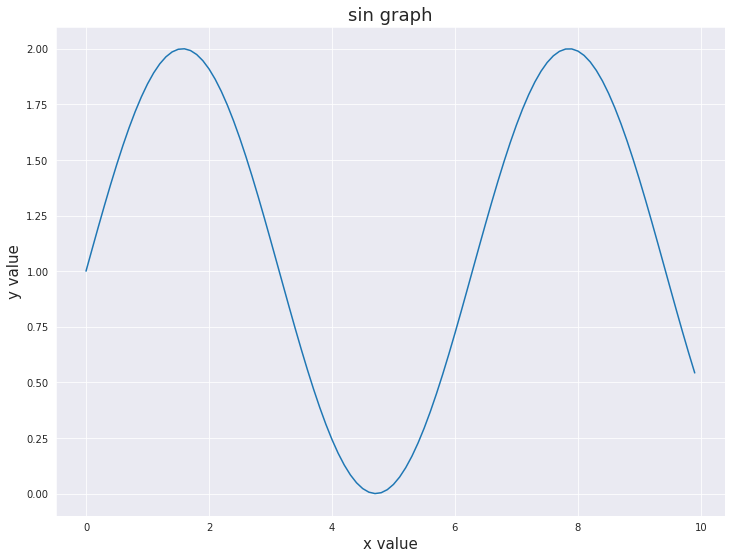

In [107]:
# grid 스타일을 설정할 수 있습니다. 
# whitegrid, darkgrid, white, dark, ticks
sns.set_style("darkgrid")

sns.lineplot(x, y)

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin graph', fontsize=18)

plt.show()

### 3-2. 2개 이상의 그래프 그리기

* color: 컬러 옵션
* alpha: 투명도 옵션

In [0]:
x = np.arange(0, 10, 0.1)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)

plt.plot(x, y_1, label='1+sin', color='blue', alpha=0.3)
plt.plot(x, y_2, label='1+cos', color='red', alpha=0.7)

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin and cos graph', fontsize=18)

plt.grid()
plt.legend()

plt.show()

### 3-3. 마커 스타일링

* marker: 마커 옵션

In [0]:
x = np.arange(0, 10, 0.1)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)

plt.plot(x, y_1, label='1+sin', color='blue', alpha=0.3, marker='o')
plt.plot(x, y_2, label='1+cos', color='red', alpha=0.7, marker='+')

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin and cos graph', fontsize=18)

plt.grid()
plt.legend()

plt.show()

### 3-4 라인 스타일 변경하기

* linestyle: 라인 스타일 변경 옵션

In [0]:
x = np.arange(0, 10, 0.1)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)

plt.plot(x, y_1, label='1+sin', color='blue', linestyle=':')
plt.plot(x, y_2, label='1+cos', color='red', linestyle='-.')

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin and cos graph', fontsize=18)

plt.grid()
plt.legend()

plt.show()

## 4. Areaplot (Filled Area)

matplotlib에서 area plot을 그리고자 할 때는 **fill_between 함수**를 사용합니다.

In [108]:
y = np.random.randint(low=5, high=10, size=20)
y

array([8, 5, 6, 6, 8, 6, 5, 7, 9, 6, 6, 9, 8, 7, 6, 7, 6, 7, 8, 5])

### 4-1. 기본 areaplot 그리기

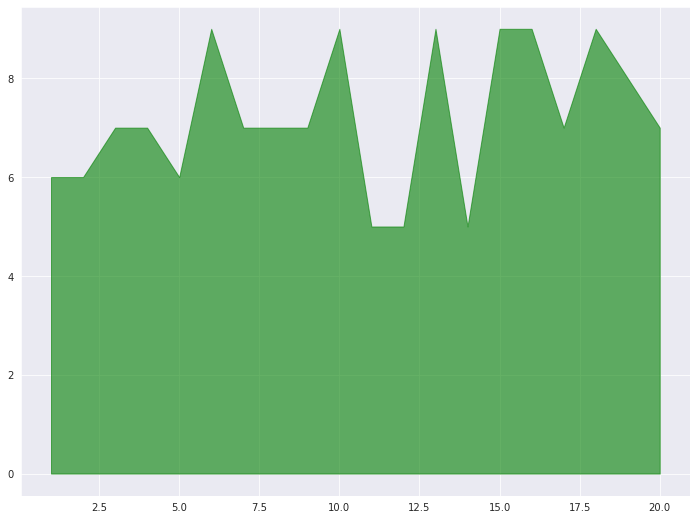

In [109]:
x = np.arange(1,21)
y =  np.random.randint(low=5, high=10, size=20)

# fill_between으로 색칠하기
plt.fill_between(x, y, color="green", alpha=0.6)
plt.show()

### 4-2. 경계선을 굵게 그리고 area는 옅게 그리는 효과 적용

In [0]:
plt.fill_between( x, y, color="green", alpha=0.3)
plt.plot(x, y, color="green", alpha=0.8)

### 4-3. 여러 그래프를 겹쳐서 표현

In [0]:
x = np.arange(1, 10, 0.05)
y_1 =  np.cos(x)+1
y_2 =  np.sin(x)+1
y_3 = y_1 * y_2 / np.pi

plt.fill_between(x, y_1, color="green", alpha=0.1)
plt.fill_between(x, y_2, color="blue", alpha=0.2)
plt.fill_between(x, y_3, color="red", alpha=0.3)

Seaborn에서는 **area plot을 지원하지 않습니다.**

`matplotlib`을 활용하여 구현해야 합니다.

## 5. Histogram

### 5-1. 기본 Histogram 그리기

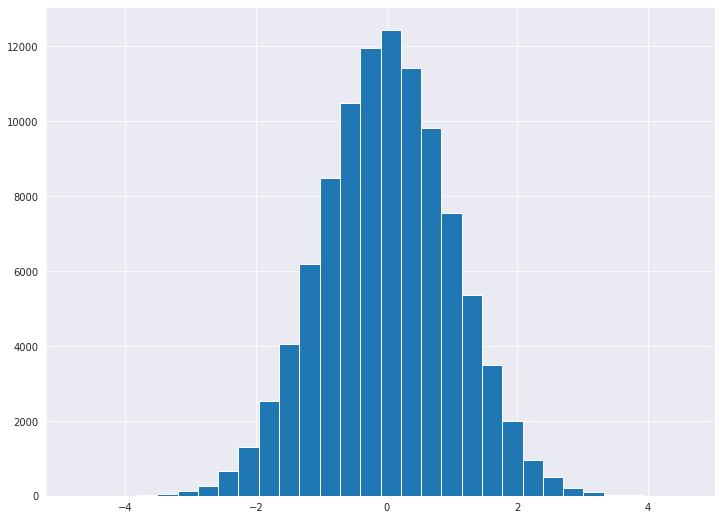

In [110]:
N = 100000
bins = 30

x = np.random.randn(N)

plt.hist(x, bins=bins)

plt.show()

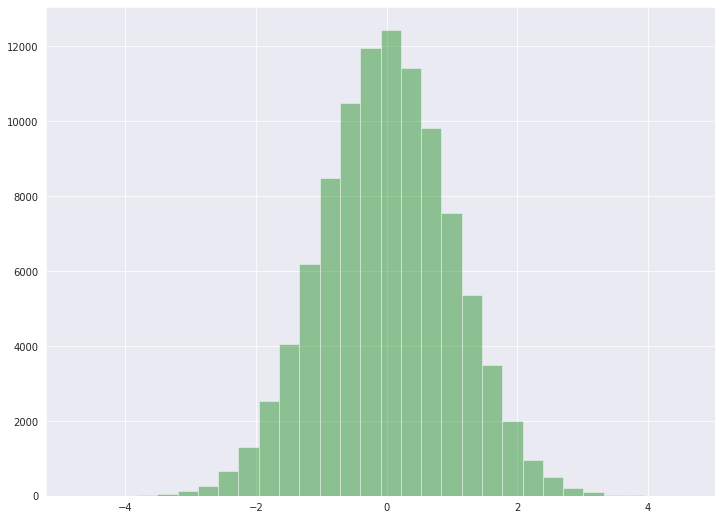

In [111]:
sns.distplot(x, bins=bins, kde=False, hist=True, color='g')

`kde`을 **True**로 설정해주면, **Density**가 Y축에 표기 됩니다.

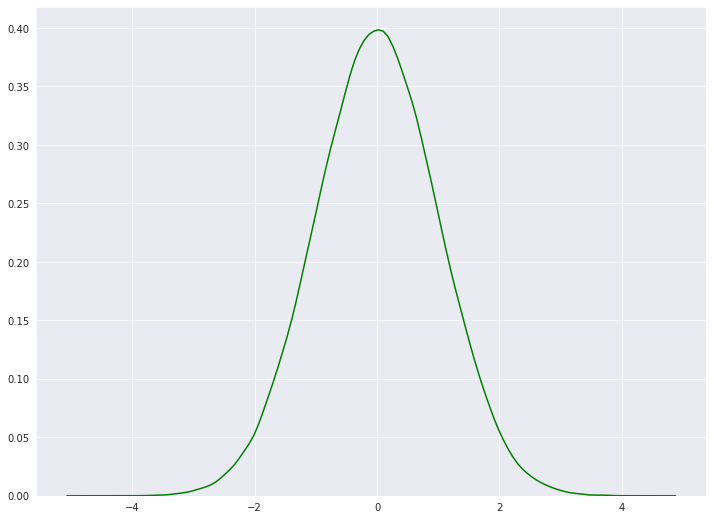

In [112]:
sns.distplot(x, bins=bins, kde=True, hist=False, color='g')

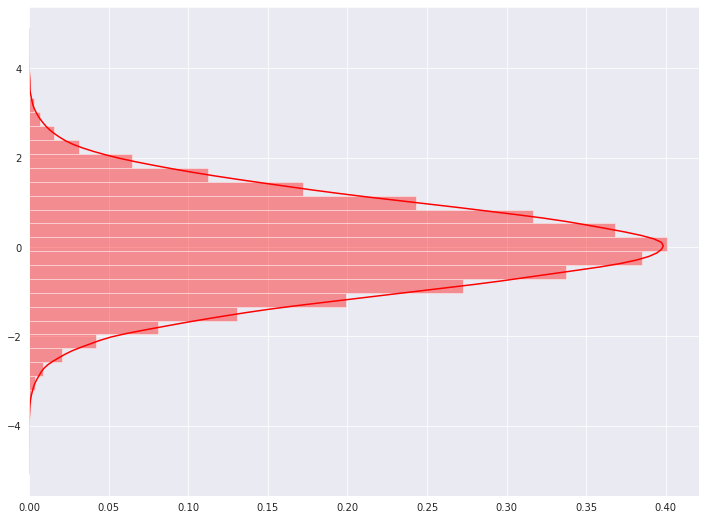

In [115]:
sns.distplot(x, bins=bins, kde=True, hist=True, vertical=True, color='r')

* sharey: y축을 다중 그래프가 share
* tight_layout: graph의 패딩을 자동으로 조절해주어 fit한 graph를 생성

### 5-2. 다중 Histogram 그리기

In [0]:
N = 100000
bins = 30

x = np.random.randn(N)

fig, axs = plt.subplots(1, 3, 
                        sharey=True, 
                        tight_layout=True
                       )

fig.set_size_inches(12, 5)

axs[0].hist(x, bins=bins)
axs[1].hist(x, bins=bins*2)
axs[2].hist(x, bins=bins*4)

plt.show()

### 5-3. Y축에 Density 표기

In [0]:
N = 100000
bins = 30

x = np.random.randn(N)

fig, axs = plt.subplots(1, 2, 
                        tight_layout=True
                       )
fig.set_size_inches(9, 3)

# density=True 값을 통하여 Y축에 density를 표기할 수 있습니다.
axs[0].hist(x, bins=bins, density=True, cumulative=True)
axs[1].hist(x, bins=bins, density=True)

plt.show()

## 6. Pie Chart 

**pie chart 옵션**

* explode: 파이에서 툭 튀어져 나온 비율
* autopct: 퍼센트 자동으로 표기
* shadow: 그림자 표시
* startangle: 파이를 그리기 시작할 각도

texts, autotexts 인자를 리턴 받습니다.

**texts**는 label에 대한 텍스트 효과를

**autotexts**는 파이 위에 그려지는 텍스트 효과를 다룰 때 활용합니다.

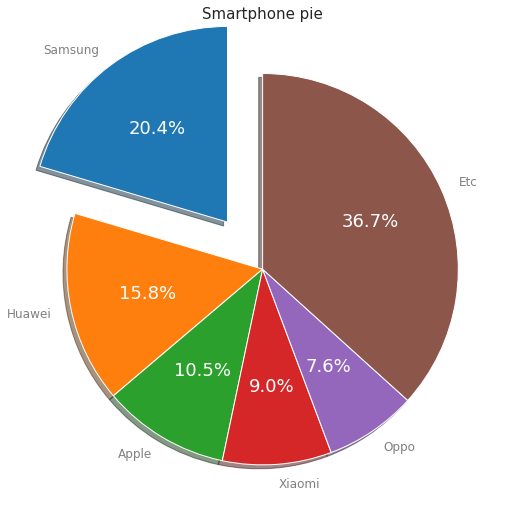

In [116]:
labels = ['Samsung', 'Huawei', 'Apple', 'Xiaomi', 'Oppo', 'Etc']
sizes = [20.4, 15.8, 10.5, 9, 7.6, 36.7]
explode = (0.3, 0, 0, 0, 0, 0)

# texts, autotexts 인자를 활용하여 텍스트 스타일링을 적용합니다
patches, texts, autotexts = plt.pie(sizes, 
                                    explode=explode, 
                                    labels=labels,  
                                    autopct='%1.1f%%',
                                    shadow=True, 
                                    startangle=90)

plt.title('Smartphone pie', fontsize=15)

# label 텍스트에 대한 스타일 적용
for t in texts:
    t.set_fontsize(12)
    t.set_color('gray')
    
# pie 위의 텍스트에 대한 스타일 적용
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(18)

plt.show()

Seaborn에서는 **pie plot을 지원하지 않습니다.**

`matplotlib`을 활용하여 구현해야 합니다.

## 7. Box Plot

샘플 데이터를 생성합니다.

In [0]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

### 7-1 기본 박스플롯 생성

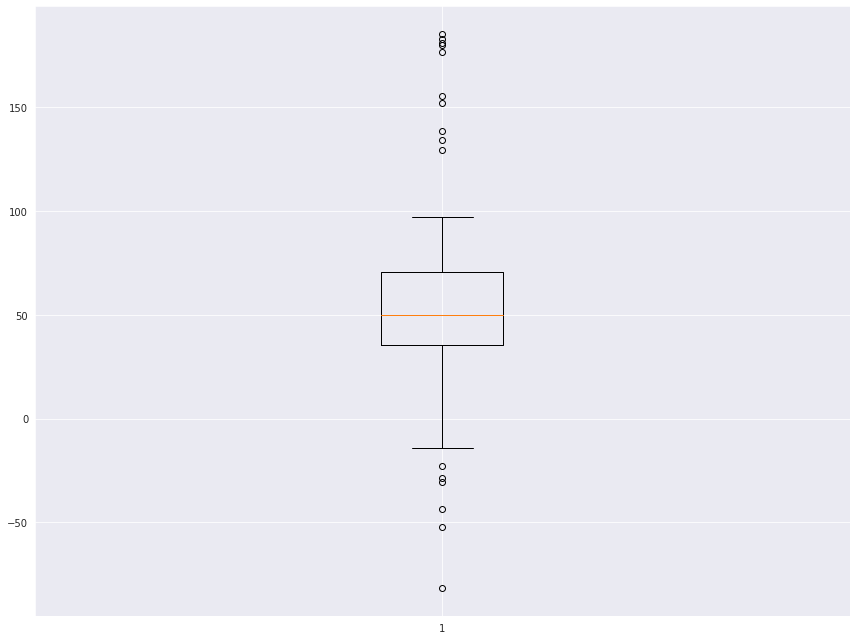

In [118]:
plt.boxplot(data)
plt.tight_layout()
plt.show()

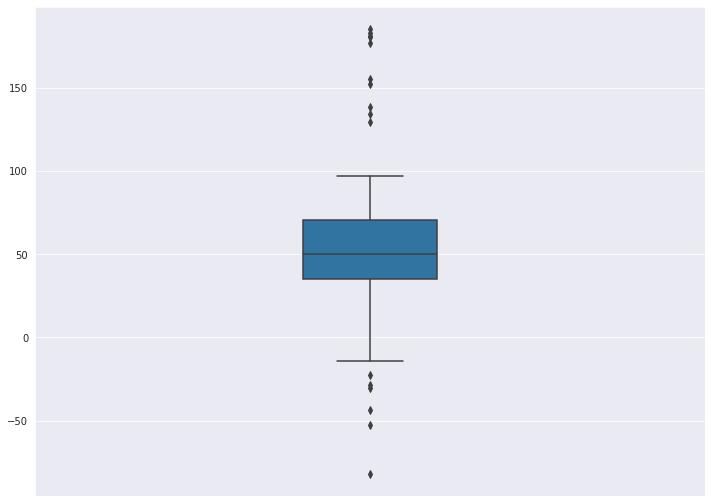

In [122]:
sns.boxplot(data, orient='v', width=0.2)
plt.show()

### 7-2. 다중 박스플롯 생성

In [0]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

spread = np.random.rand(50) * 100
center = np.ones(25) * 40

flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100

d2 = np.concatenate((spread, center, flier_high, flier_low))

data.shape = (-1, 1)
d2.shape = (-1, 1)

data = [data, d2, d2[::2,0]]

**boxplot()**으로 매우 쉽게 생성할 수 있습니다.

다중 그래프 생성을 위해서는 data 자체가 **2차원으로 구성**되어 있어야 합니다.

row와 column으로 구성된 DataFrame에서 Column은 X축에 Row는 Y축에 구성된다고 이해하시면 됩니다.

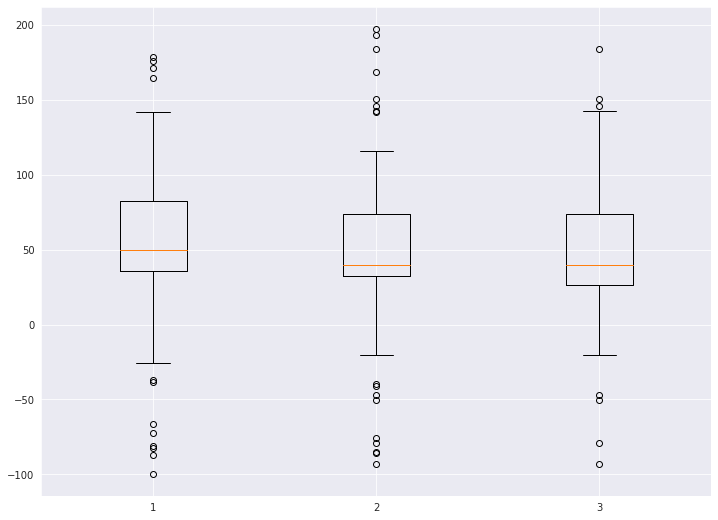

In [124]:
plt.boxplot(data)
plt.show()

seaborn에서 boxplot을 그릴 때는DataFrame을 가지고 그릴 때 주로 활용합니다. 

**barplot**과 마찬가지로, 용도에 따라 적절한 라이브러리를 사용합니다.

**실전 tip.**
* 그래프를 임의로 그려야 하는 경우 -> `matplotlib`
* DataFrame을 가지고 그리는 경우 -> `seaborn`

seaborn 에서는 `hue` 옵션으로 매우 쉽게 비교 **boxplot**을 그릴 수 있습니다.

In [125]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


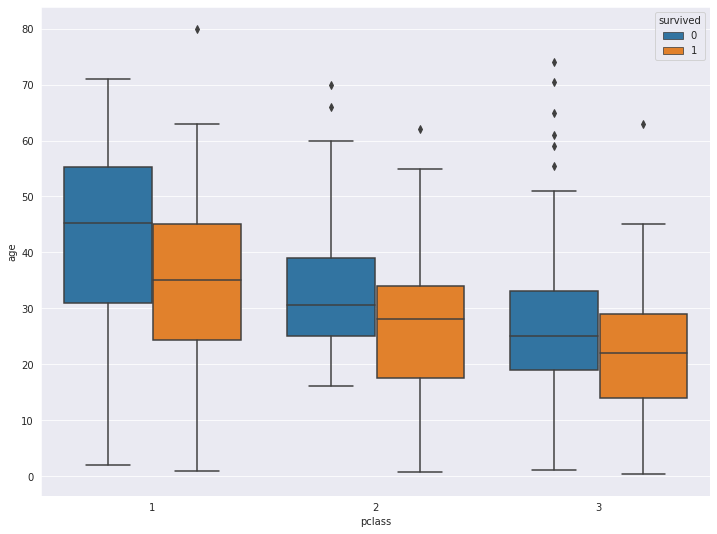

In [126]:
sns.boxplot(x='pclass', y='age', hue='survived', data=titanic)
plt.show()

### 7-3. Box Plot 축 바꾸기

**vert=False**  옵션을 통해 표시하고자 하는 축을 바꿀 수 있습니다.

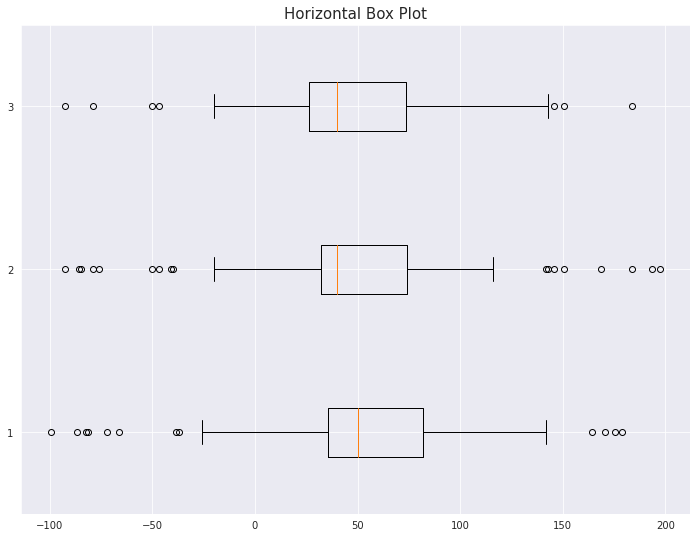

In [127]:
plt.title('Horizontal Box Plot', fontsize=15)
plt.boxplot(data, vert=False)

plt.show()

### 7-4. Outlier 마커 심볼과 컬러 변경

In [0]:
outlier_marker = dict(markerfacecolor='r', marker='D')

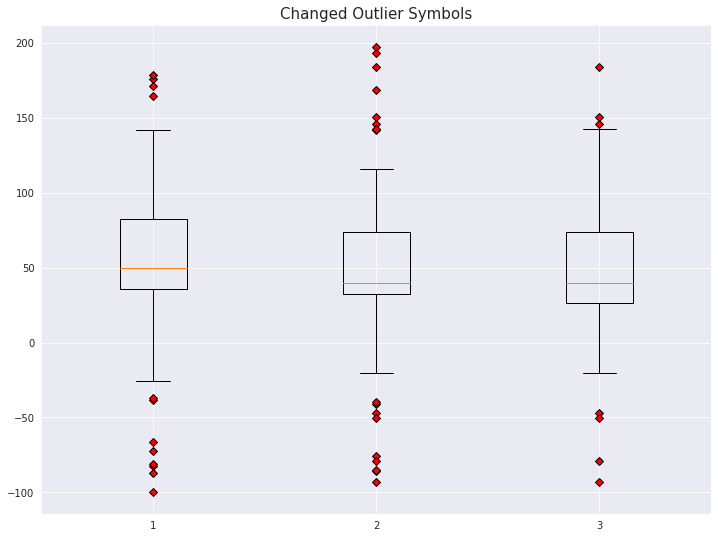

In [129]:
plt.title('Changed Outlier Symbols', fontsize=15)
plt.boxplot(data, flierprops=outlier_marker)

plt.show()

## 8. 3D 그래프 그리기

3d 로 그래프를 그리기 위해서는 `mplot3d`를 추가로 import 합니다

In [0]:
from mpl_toolkits import mplot3d

### 8-1. 밑그림 그리기 (캔버스)

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### 8-2. 3d plot 그리기

In [0]:
# project=3d로 설정합니다
ax = plt.axes(projection='3d')

# x, y, z 데이터를 생성합니다
z = np.linspace(0, 15, 1000)
x = np.sin(z)
y = np.cos(z)

ax.plot(x, y, z, 'gray')
plt.show()

In [0]:
# project=3d로 설정합니다
ax = plt.axes(projection='3d')

sample_size = 100
x = np.cumsum(np.random.normal(0, 1, sample_size))
y = np.cumsum(np.random.normal(0, 1, sample_size))
z = np.cumsum(np.random.normal(0, 1, sample_size))

ax.plot3D(x, y, z, alpha=0.6, marker='o')

plt.title("ax.plot")
plt.show()

### 8-3. 3d-scatter 그리기

In [0]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 500

x = np.cumsum(np.random.normal(0, 5, sample_size))
y = np.cumsum(np.random.normal(0, 5, sample_size))
z = np.cumsum(np.random.normal(0, 5, sample_size))

ax.scatter(x, y, z, c = z, s=20, alpha=0.5, cmap='Greens')

plt.title("ax.scatter")
plt.show()

### 8-4. contour3D 그리기 (등고선)

In [0]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
x, y = np.meshgrid(x, y)

z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')

ax.contour3D(x, y, z, 20, cmap=plt.cm.rainbow)

plt.title("ax.contour3D")
plt.show()

## 9. imshow

이미지(image) 데이터와 유사하게 행과 열을 가진 2차원의 데이터를 시각화 할 때는 `imshow`를 활용합니다.

In [0]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.images[:10]
X[0]

* `load_digits`는 0~16 값을 가지는 array로 이루어져 있습니다.

* 1개의 array는 8 X 8 배열 안에 표현되어 있습니다.

* 숫자는 0~9까지 이루어져있습니다.

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, figsize=(12, 6), sharey=True)

for i in range(10):
    axes[i//5][i%5].imshow(X[i], cmap='Blues')
    axes[i//5][i%5].set_title(str(i), fontsize=20)
    
plt.tight_layout()
plt.show()

### References

[Matplotlib Document](https://matplotlib.org/)